# UBI Test

A visualisation of how a Universal Basic Income Transfer affects the income distribution throughout time, when accounting for investment income and capital accumulation.

In [392]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

```python
import matplotlib.pyplot as plt

def plot_distribs(ubi_array, x=250):
    # Set the figure size
    plt.figure(figsize=(18, 6))  # Width: 12 inches, Height: 6 inches
    colors = plt.cm.viridis(np.linspace(0, 1, len(ubi_array)))
    # Plot the bar chart
    for i, df in enumerate(ubi_array):
        df = df.drop(df[df['Income Range'].str.split('-').str[-1].astype(int) > x*1000].index)
        plt.bar(range(len(df)), df["Number of People"], color = colors[i] )
        
    # Set x-tick positions to every fifth element
    plt.xticks(np.arange(0, len(df), 5))

    tick_labels = [df["Income Range"].iloc[i] if i % 25 == 0 else '' for i in range(0,len(df),5)]
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.gca().set_xticklabels(tick_labels)

    # Add labels and title
    plt.xlabel('Income Range, Thousands')
    plt.ylabel('Number of People')
    plt.title('Frequency Chart of Income Distribution')

    # Show plot
    plt.show()


In [393]:
#Choose number of periods to model
I = 5

## The Starting Income Distribution

### Generate the Distribution

Here, I synthetically generate a log-normal distribution, given strong empirical evidence backing the principle that a log-normal is a strong approximation for the observed/empirical income distribution.

In [394]:

# Desired mean and mode (peak)
mean_X = 50000  # Desired meabn
mode_X = 25000  # Desired mode (peak)
pop = 1*(10**3) # Desired population

# Calculate parameters for the log-normal distribution
sigma_log = np.sqrt(np.log(1 + ((mode_X / mean_X)**2)))
mu_log = np.log(mean_X) - (0.5 * sigma_log**2)

# Generate random numbers following a log-normal distribution
random_numbers = np.random.lognormal(mu_log, sigma_log, pop)

# Get the income of the richest person
max_inc = max(random_numbers)

# Define income range increments
income_increments = np.arange(0, max(random_numbers) + 1000, 1000)
print(income_increments)

# Create frequency table using NumPy's histogram function
frequencies, bins = np.histogram(random_numbers, bins=income_increments)

# Create a DataFrame from the frequency table
frequency_df = pd.DataFrame({'Income Range': [f'${int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins) - 1)],
                             'Number of People': frequencies})





[     0.   1000.   2000.   3000.   4000.   5000.   6000.   7000.   8000.
   9000.  10000.  11000.  12000.  13000.  14000.  15000.  16000.  17000.
  18000.  19000.  20000.  21000.  22000.  23000.  24000.  25000.  26000.
  27000.  28000.  29000.  30000.  31000.  32000.  33000.  34000.  35000.
  36000.  37000.  38000.  39000.  40000.  41000.  42000.  43000.  44000.
  45000.  46000.  47000.  48000.  49000.  50000.  51000.  52000.  53000.
  54000.  55000.  56000.  57000.  58000.  59000.  60000.  61000.  62000.
  63000.  64000.  65000.  66000.  67000.  68000.  69000.  70000.  71000.
  72000.  73000.  74000.  75000.  76000.  77000.  78000.  79000.  80000.
  81000.  82000.  83000.  84000.  85000.  86000.  87000.  88000.  89000.
  90000.  91000.  92000.  93000.  94000.  95000.  96000.  97000.  98000.
  99000. 100000. 101000. 102000. 103000. 104000. 105000. 106000. 107000.
 108000. 109000. 110000. 111000. 112000. 113000. 114000. 115000. 116000.
 117000. 118000. 119000. 120000. 121000. 122000. 12

### Visualise the Income Distribution

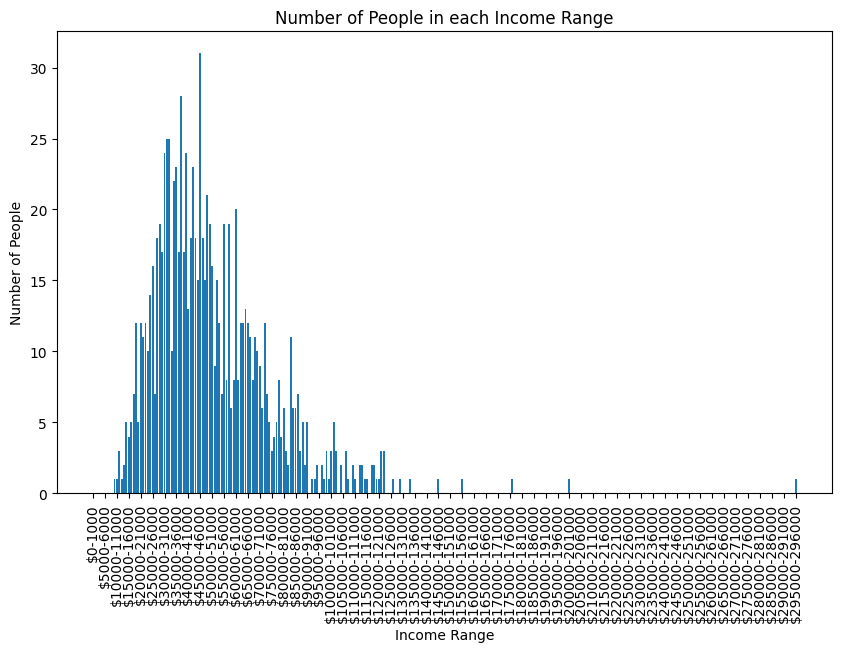

In [395]:


plt.figure(figsize=(10,6)) #set the figu
plt.bar(frequency_df['Income Range'], frequency_df['Number of People']) # add the bar series
plt.xticks(frequency_df['Income Range'][::5], rotation = 90) # rotate th

plt.xlabel('Income Range') # set the x label
plt.ylabel('Number of People') # set y label
plt.title('Number of People in each Income Range') # set the title 
plt.show()


## Starting Wealth/Capital Stock

Because savings rates are higher at higher levels of income, yet the savings rate must reach a limit (even the highest income person here is assumed to only save 90% of their additional income), I stipulate that the marginal savings rate is an increasing yet concave function of income, reaching a limit of 0.9 for the person who has the highest starting income.

### Define A Concave Function of Income That Represents the Savings Rate

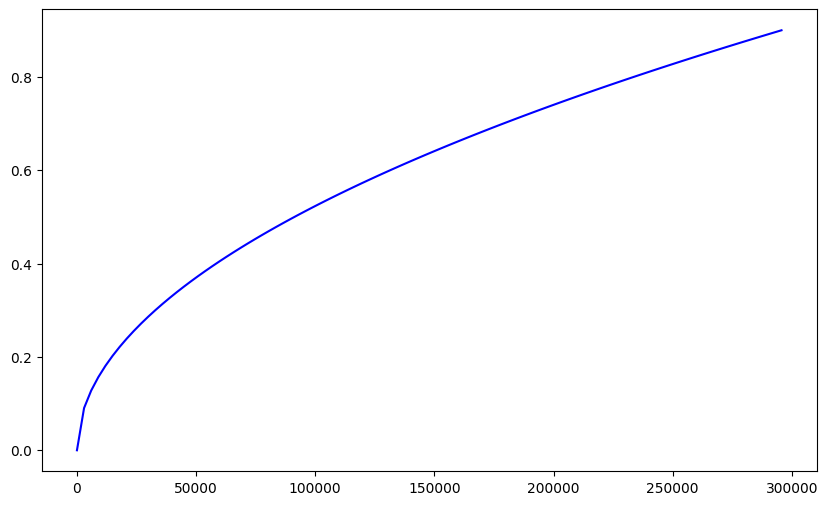

In [396]:

def savings_rate(x, max_inc=max_inc):
    return 0.9 * np.sqrt(x / max_inc)
# visualtise how this function appears for x in the range 0 to the max income
x_values = np.linspace(0, max_inc, 100)
y_values = savings_rate(x_values)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Savings Rate', color='blue')


### Define A Function Representing the Total Saved Each Year for Each Income

This is simply the integral of the previous function with respect to the starting income, which results in an increasing and convex function with respect to income (both income and savings rate increase with income, so the total annual savings rise rapidly with income)

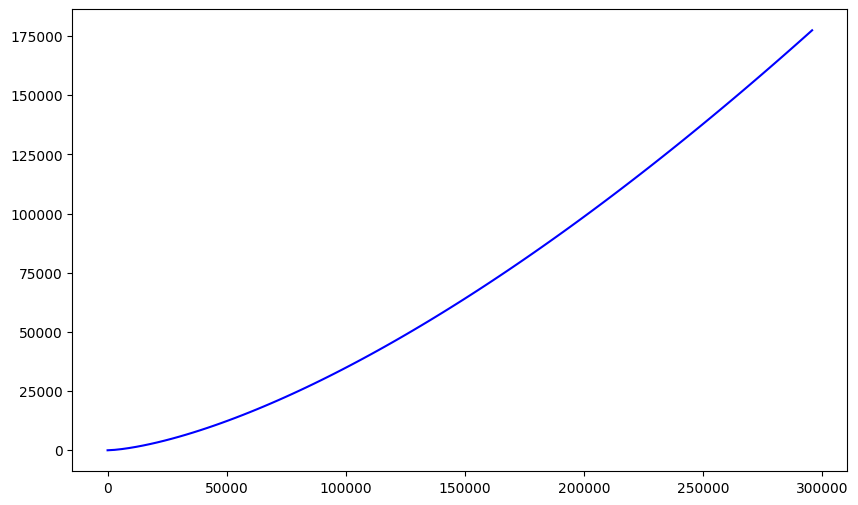

In [397]:
def saved_per_year(x):
    return (0.9/1.5) * (1/np.sqrt(max_inc)) * (x ** (1.5))
# visualtise how this function appears for x in the range 0 to the max income
x_values = np.linspace(0, max_inc, 100)
y_values = saved_per_year(x_values)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Saved Per Year', color='blue')

### Generate The Starting Wealth

Combining a higher amount of annual savings with interest applied over a number of years, we have the following final function:

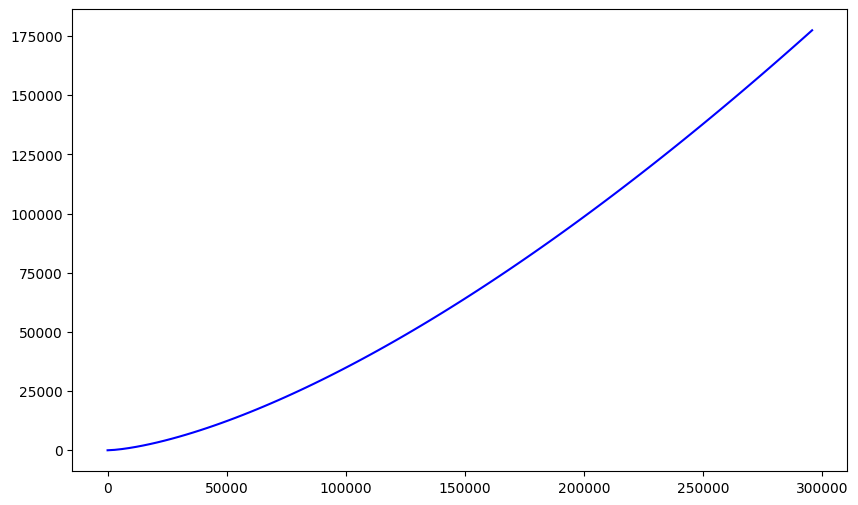

In [398]:
def starting_wealth(x, r=0.07, n=5):
    # Compound each year's savings for the appropriate number of years
    # saved_per_year(x) is the amount saved each year
    # For year k (0-based), it is compounded (n-k) times
    return sum(saved_per_year(x) * (1 + r) ** (n - k) for k in range(n))
# visualise how this function appears for x in the range 0 to the max income
x_values = np.linspace(0, max_inc, 100)
y_values = saved_per_year(x_values)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Starting Wealth', color='blue')

## The Tax System

I define a function that sets increasing marginal tax thresholds based on the prevailing income distribution at that time.

In [399]:
def gen_tax_thresholds(income_series):
    percentiles = [20, 50, 90, 99, 99.9, 99.99]
    thresholds = np.percentile(income_series, percentiles)
    thresholds = np.insert(thresholds, 0, 0)
    return list(map(float, thresholds))  # Convert to Python float


thresholds = gen_tax_thresholds(random_numbers)
thresholds[-1]

286145.4775790926

In [400]:
for i, thresh in enumerate(thresholds):
    print(i, thresh)

0 0.0
1 30800.60378463595
2 45539.16517719523
3 83150.53961112817
4 122011.35464079861
5 200422.20042528154
6 286145.4775790926


#### Define A Function To Calculate Tax For a Given Individual

In [401]:
def calc_tax(income, tax_thresholds=thresholds, tax_rates = [0, 0.2, 0.4, 0.6, 0.8, 0.9]):
    tax = 0
    for i, thresh in enumerate(tax_thresholds):
        if income > tax_thresholds[i+1]:  # Check if income exceeds the next threshold
            tax += (tax_thresholds[i + 1] - tax_thresholds[i]) * tax_rates[i] # if so, calclulate tax for the full range
        else:
            tax += (income - tax_thresholds[i]) * tax_rates[i] # otherwise, calculate tax for the income up to the threshold
            break  # Exit the loop once the income is below the next threshold
    return tax

calc_tax(170000)

79699.6673572484

#### Define A Vectorised Format of the Function To Calculate Tax Burden

In [402]:
def calc_tax_vectorized(incomes, thresholds=thresholds, rates=[0, 0.2, 0.4, 0.5, 0.6, 0.7]):
    # Convert to NumPy array for vectorized ops
    incomes = np.asarray(incomes)  # Ensure incomes is a NumPy array
    tax = np.zeros_like(incomes, dtype=float)  # Initialize tax array

    for i in range(len(thresholds) - 1):
        lower = thresholds[i]  # Lower threshold for this bracket
        upper = thresholds[i + 1]  # Upper threshold for this bracket
        rate = rates[i]  # Tax rate for this bracket
        taxable = np.clip(incomes, lower, upper) - lower  # Amount taxable in this bracket (windsorises income to the bracket limits)
        tax += taxable * rate  # Add tax for this bracket

    # For income above last threshold
    taxable_last = np.clip(incomes - thresholds[-1], 0, None)  # Taxable income above last threshold
    tax += taxable_last * rates[-1]  # Add tax for income above last threshold

    return pd.Series(tax)

calc_tax_vectorized(random_numbers)


0        8821.971644
1         330.691223
2           0.000000
3        3109.217568
4           0.000000
           ...      
995      2012.121229
996         0.000000
997        29.003646
998    151142.837046
999      1860.339250
Length: 1000, dtype: float64

## Simulate the Changes in Income, Transfers, UBI and Wealth Each Period

In [403]:
data = pd.DataFrame({'lab_income_1': random_numbers})


def gen_period_i(data = data, i = 1, tax = 0.2, r = 0.07, s=0.2, a =0.4):
    covered_columns = []
    
    for x in range(1, i+1, 1):


        # Calculate starting wealth for each individual based on their initial labour income
        data['capital_1'] = starting_wealth(data['lab_income_1'])
        # Calculate investment income for period x
        data['inv_income_' + str(x)] = r * data['capital_' + str(x)]
        # Total income is labour income plus investment income for period x
        data['income_' + str(x)] = data['lab_income_' + str(x)] + data['inv_income_' + str(x)]
        current_max_inc = max(data['income_' + str(x)])  # Update max income for the current period
        # Genereate the current tax thresholds for period x
        current_thresholds = gen_tax_thresholds(data['income_' + str(x)])
        # Calculate tax for period x (applied to total income plus investment income)
        data['tax_' + str(x)] = calc_tax_vectorized(data['income_' + str(x)], thresholds= current_thresholds)
        # Calculate UBI amount for period x (redistribute 100a% of total tax revenue equally)
        data['ubi_amount_' + str(x)] = (a * sum(data['tax_' + str(x)])) / pop
        # Net transfer is UBI received minus tax paid for period x
        data['net_transfer_' + str(x)] = data['ubi_amount_' + str(x)] - data['tax_' + str(x)]
        # Disposable income is total income plus net transfer and investment income for period x
        data['disposable_income_' + str(x)] = data['income_' + str(x)] + data['net_transfer_' + str(x)]
        # Income available to spend after saving for period x
        data['income_to_spend_' + str(x)] = (1-savings_rate(data['disposable_income_' + str(x)], max_inc=current_max_inc)) * data['disposable_income_' + str(x)]
        # Amount invested (saved) for period x
        data['inv_made_' + str(x)] = savings_rate(data['disposable_income_' + str(x)], max_inc=current_max_inc) * data['disposable_income_' + str(x)]
        
        # Categorise all relevant columns into bins for period x (supports visualisation)
        for col in data.columns:
            if col not in ['category_' + str(y) for y in range(1, i+2)] and col not in covered_columns:
                cat_col = (col[:-2] + '_category_' + str(x)) # get the base name of the column and append '_category_x'
                
                # Find the current range and increments for this column
                current_col_max = max(data[col])
                #current_col_min = 0
                current_col_min = min(data[col])

                current_col_increments = np.arange(current_col_min-1000, current_col_max + 1000, 1000)

                # Create frequency table using NumPy's histogram function
                col_frequencies, col_bins = np.histogram(data[col], bins=current_col_increments)

                # Create a DataFrame from the frequency table
                col_frequency_df = pd.DataFrame({'Range': [f'${int(col_bins[i])}-{int(col_bins[i+1])}' for i in range(len(col_bins) - 1)],
                                            'Number of People': col_frequencies})
                data[cat_col] = pd.cut(data[col], bins=col_bins, labels=col_frequency_df['Range']) #group the data by these categories
                covered_columns.append(col) # append the column to the covered columns list
                covered_columns.append(cat_col) # append the category column to the covered columns list
                        
        # Update capital for next period by adding new investment
        data['capital_' + str(x+1)] = data['capital_' + str(x)] + data['inv_made_' + str(x)] 
        # Update labour income for next period, accounting for productivity gains from investment
        data['lab_income_' + str(x+1)] = data['lab_income_' + str(x)] + ((1-a)/a) * r * data['capital_' + str(x+1)]
        
    return data
# Display the DataFrame
data = gen_period_i(i=I)
#data.to_csv('data.csv', index=False)


In [404]:
data

,lab_income_1,capital_1,inv_income_1,income_1,tax_1,ubi_amount_1,net_transfer_1,disposable_income_1,income_to_spend_1,inv_made_1,...,inv_income_category_5,income_category_5,tax_category_5,ubi_amount_category_5,net_transfer_category_5,disposable_income_category_5,income_to_spend_category_5,inv_made_category_5,capital_6,lab_income_6
0,60224.813590,1.003502e+05,7024.510760,67249.324350,10194.179810,3188.14079,-7006.039019,60243.285331,38426.754506,21816.530825,...,$14192-15192,$143465-144465,$23000-24000,$6800-7800,$-16801--15801,$127266-128266,$86921-87921,$39344-40344,2.503437e+05,1.553058e+05
1,32454.059898,3.969706e+04,2778.794531,35232.854429,372.617226,3188.14079,2815.523564,38048.377993,27098.054695,10950.323298,...,$6192-7192,$68465-69465,$0-1000,$6800-7800,$6198-7198,$75266-76266,$56921-57921,$17344-18344,1.104327e+05,7.363712e+04
2,27954.341618,3.173429e+04,2221.400103,30175.741721,0.000000,3188.14079,3188.140790,33363.882511,24372.269749,8991.612762,...,$4192-5192,$56465-57465,$-1000-0,$6800-7800,$7198-8198,$64266-65266,$49921-50921,$14344-15344,8.873292e+04,6.110045e+04
3,45942.928400,6.686254e+04,4680.377640,50623.306040,3543.772486,3188.14079,-355.631695,50267.674345,33639.065803,16628.608542,...,$10192-11192,$104465-105465,$8000-9000,$6800-7800,$-801-198,$103266-104266,$73921-74921,$29344-30344,1.785967e+05,1.128160e+05
4,15198.788537,1.272238e+04,890.566479,16089.355016,0.000000,3188.14079,3188.140790,19277.495806,15328.391123,3949.104684,...,$1192-2192,$26465-27465,$-1000-0,$6800-7800,$7198-8198,$34266-35266,$28921-29921,$5344-6344,3.632390e+04,2.883022e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40861.209932,5.608177e+04,3925.723600,44786.933532,2283.433047,3188.14079,904.707743,45691.641276,31281.180819,14410.460457,...,$8192-9192,$90465-91465,$5000-6000,$6800-7800,$2198-3198,$92266-93266,$67921-68921,$24344-25344,1.514776e+05,9.754550e+04
996,28588.543076,3.282033e+04,2297.422768,30885.965844,0.000000,3188.14079,3188.140790,34074.106634,24793.861725,9280.244909,...,$5192-6192,$58465-59465,$-1000-0,$6800-7800,$7198-8198,$66266-67266,$50921-51921,$14344-15344,9.183777e+04,6.287176e+04
997,30945.622016,3.696185e+04,2587.329321,33532.951338,32.636608,3188.14079,3155.504182,36688.455520,26319.933254,10368.522266,...,$5192-6192,$64465-65465,$0-1000,$6800-7800,$7198-8198,$72266-73266,$54921-55921,$16344-17344,1.036676e+05,6.955596e+04
998,295670.286152,1.091607e+06,76412.499831,372082.785983,195763.926396,3188.14079,-192575.785605,179507.000378,67293.578801,112213.421577,...,$123192-124192,$1034465-1035465,$571000-572000,$6800-7800,$-564801--563801,$470266-471266,$184921-185921,$285344-286344,2.054442e+06,1.126600e+06


## Analysing the Results Throughout Time

### Define a function that makes pivot tables for sum of a variable grouped by income_category_1

In [405]:
def make_groups(data, idx_x=1,x=1, coltype="income_category_", coltypes=['lab_income_', 'inv_income_']):
    columns = [(col + str(x)) for col in coltypes]
    idx = coltype + str(idx_x)
    # Aggregate by sum
    grouped_sum = data.pivot_table(values=columns, index=idx, aggfunc='sum', observed=False)
    grouped_sum = grouped_sum[columns]
    grouped_sum.columns = ['sum_' + col for col in grouped_sum.columns]
    # Aggregate by mean
    grouped_mean = data.pivot_table(values=columns, index=idx, aggfunc='mean', observed=False)
    grouped_mean = grouped_mean[columns]
    grouped_mean.columns = ['mean_' + col for col in grouped_mean.columns]
    # Aggregate by count (using the first column as representative)
    grouped_count = data.pivot_table(values=columns[0], index=idx, aggfunc='count', observed=False)
    grouped_count.columns = ['count_' + str(x)]
    # Merge horizontally
    grouped_df = pd.concat([grouped_sum, grouped_mean, grouped_count], axis=1)
    return grouped_df

make_groups(data, x=2).iloc[100:120]

,sum_lab_income_2,sum_inv_income_2,mean_lab_income_2,mean_inv_income_2,count_2
income_category_1,,,,,
$109329-110329,0.000000,0.000000,NaN,NaN,0
$110329-111329,243838.334386,33671.636515,121919.167193,16835.818257,2
$111329-112329,0.000000,0.000000,NaN,NaN,0
$112329-113329,372306.434776,51699.002235,124102.144925,17233.000745,3
$113329-114329,124840.742646,17367.875883,124840.742646,17367.875883,1
$114329-115329,125901.565279,17562.088587,125901.565279,17562.088587,1
$115329-116329,382646.592009,53594.235604,127548.864003,17864.745201,3
$116329-117329,515360.733037,72411.571740,128840.183259,18102.892935,4
$117329-118329,388631.693844,54699.089007,129543.897948,18233.029669,3


## Define a function that makes an array of dataframes, 
1 for each period, each with one column which is each income category, and the others are the sums of other variables that are in each category/grouped by each category

In [406]:
def gen_ubi_array(data=data, i=1, fix_x = True, coltypes = ['lab_income_', 'inv_income_']):
    ubi_array = []
    for x in range(1, i + 1):  # Corrected the range to include i
        idx_x = x
        if fix_x:
            idx_x = 1
        grouped_df = make_groups(data, idx_x=idx_x,x=x, coltypes = coltypes).reset_index()
        ubi_array.append(grouped_df)
    return ubi_array
        
        
gen_ubi_array(i = I, coltypes = ['lab_income_', 'inv_income_', 'net_transfer_'])[1]

,income_category_1,sum_lab_income_2,sum_inv_income_2,sum_net_transfer_2,mean_lab_income_2,mean_inv_income_2,mean_net_transfer_2,count_2
0,$9329-10329,10806.057032,627.954421,4082.349676,10806.057032,627.954421,4082.349676,1
1,$10329-11329,11845.198399,712.028859,4082.349676,11845.198399,712.028859,4082.349676,1
2,$11329-12329,25069.107301,1539.087248,8164.699351,12534.553650,769.543624,4082.349676,2
3,$12329-13329,26853.708542,1692.006305,8164.699351,13426.854271,846.003152,4082.349676,2
4,$13329-14329,29664.874993,1940.840857,8164.699351,14832.437497,970.420429,4082.349676,2
...,...,...,...,...,...,...,...,...
358,$367329-368329,0.000000,0.000000,0.000000,NaN,NaN,NaN,0
359,$368329-369329,0.000000,0.000000,0.000000,NaN,NaN,NaN,0
360,$369329-370329,0.000000,0.000000,0.000000,NaN,NaN,NaN,0
361,$370329-371329,0.000000,0.000000,0.000000,NaN,NaN,NaN,0


In [407]:
UBI = gen_ubi_array(i = I, coltypes = ['lab_income_', 'inv_income_', 'income_','net_transfer_', 'disposable_income_', 'inv_made_'])
UBI2 = gen_ubi_array(i = I, coltypes = ['lab_income_', 'inv_income_'])


### Define and Use a Function That Plots the Distribution of the Categorised Variables for One of the Periods in the UBI DataFrame

In [408]:
def plot_ubi(ubi, x=250, i = 0, coltype = 'income_category', coltypes = ['sum_lab_income_', 'sum_inv_income_']):
        # Set the figure size
        plt.figure(figsize=(18, 6))  # Width: 12 inches, Height: 6 inches
    
        df = ubi
        # select only the rows that we want to plot (avoid high outliers)
        df = df.drop(df[df[coltype + '_' + str(i+1)].str.split('-').str[-1].astype(int) > x*1000].index)
        # select only the columns that we want to plot
        cols_to_plot = [col for col in df.columns[1:] if any(ct in col for ct in coltypes)]
        bottom = None
        num_bars = len(cols_to_plot)
        for ct in coltypes:
            if "mean_disposable_income" in ct:
                num_bars -= 1
                #print("colour removed for coltype:", ct)
        colors = plt.cm.viridis(np.linspace(0, 1, num_bars))  # Generate a range of colors from yellow to red
        nth_bar = 0
        # Plot each selected column as a stacked bar
        
        for n, col in enumerate(cols_to_plot):
                series = df[col]
                if "mean_inv_made" in col:
                      series = -df[col] # reverse investments made, as should be deducted from income
                # Plot as red line if it's 'mean_disposable_income'
                if "mean_disposable_income" in col:
                    plt.plot(range(len(df)), series, color='red', label=str(col), linewidth=2)
                    continue  # Skip to next column (don’t treat as bar)
                if n == 0:
                    plt.bar(range(len(df)), series, color=colors[nth_bar], label=str(col))  # Use color from the gradient
                    bottom = df[col]  # Update the bottom values for subsequent sets of bars
                    nth_bar += 1
                else:
                    plt.bar(range(len(df)), series, bottom=bottom, color=colors[nth_bar], label=str(col))  # Use color from the gradient
                    bottom += df[col]  # Update the bottom values for subsequent sets of bars
                    nth_bar += 1

        # Set x-tick positions to every fifth element
        plt.xticks(np.arange(0, len(df), 5))


        #tick_labels = [df["Income Range"].iloc[i] if i % 25 == 0 else '' for i in range(0,len(df),5)]
        plt.xticks(rotation=90)  # Rotate labels for better readability
        #plt.gca().set_xticklabels(tick_labels)

        # Add labels and title
        plt.xlabel('Starting Income Range, Thousands')
        plt.ylabel('Breakdown of Income')
        plt.title('Income by Source Depending on Income Category')
        plt.legend()

        # Show plot
        plt.show()
    


### Examine Income Breakdown by Investment and Labour Income

##### First Period

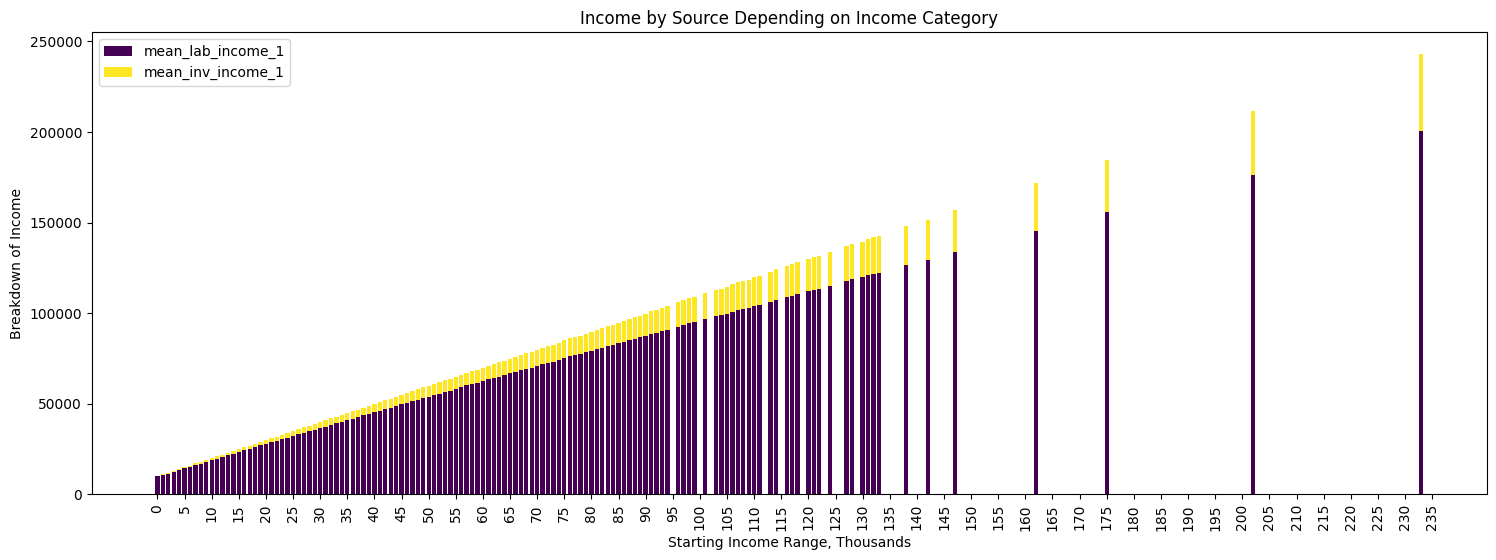

In [409]:
plot_ubi(ubi = UBI[0], coltypes = ["mean_lab_income", "mean_inv_income"])

#### Observe the Average Net Transfer For Each Income Category and the Extent to Which it Offsets Investment Income

##### Period 1

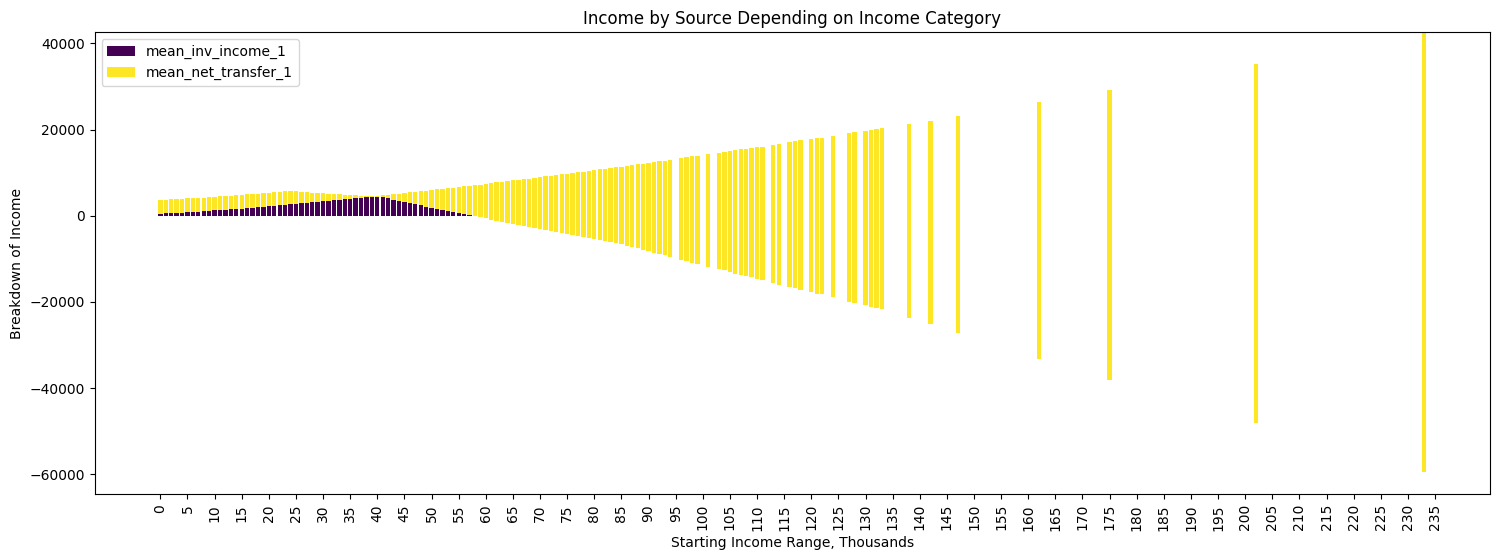

In [410]:
plot_ubi(ubi = UBI[0], coltypes = ["mean_inv_income", "mean_net_transfer_"])

##### Period 5

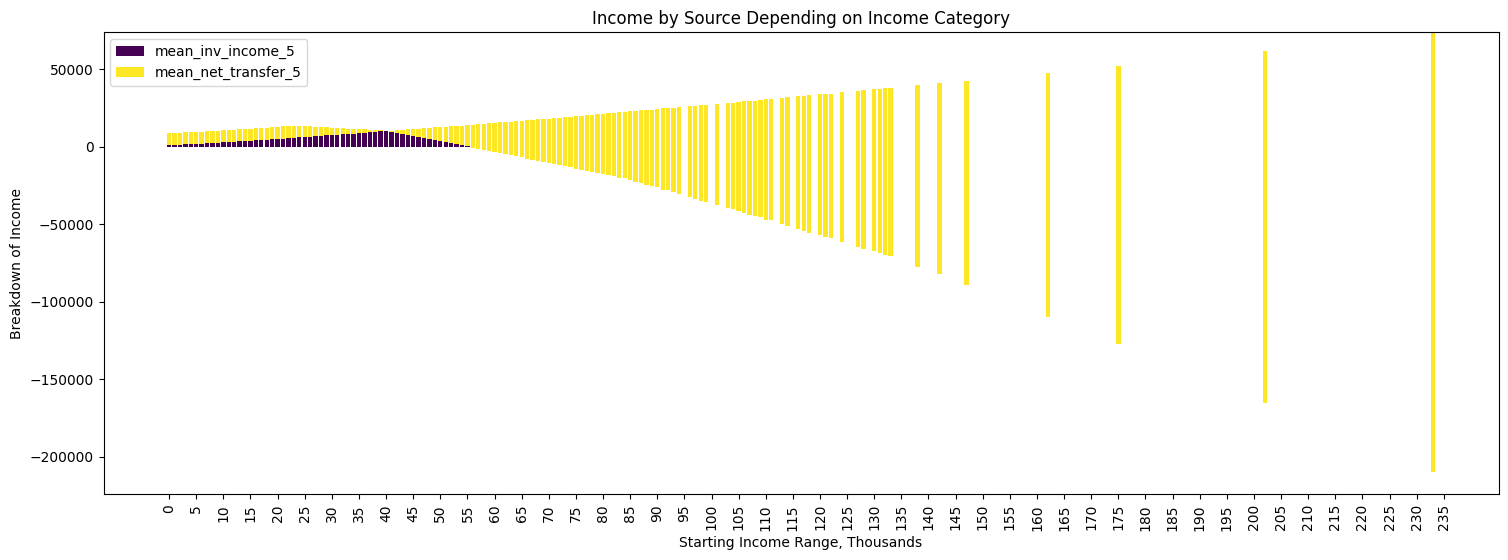

In [411]:
plot_ubi(ubi = UBI[4], coltypes = ["mean_inv_income_", "mean_net_transfer_"])

#### Compare Mean Income Relative to What Is Left Over After Transfers And Investments

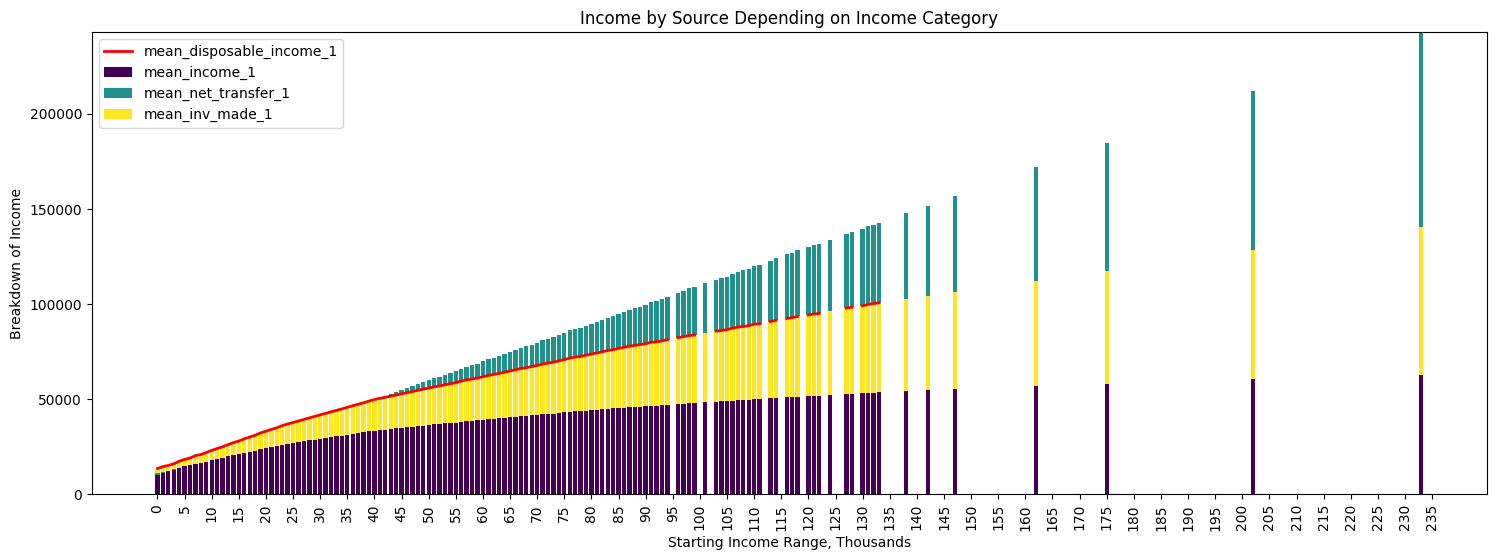

In [412]:
plot_ubi(ubi = UBI[0], coltypes = ["mean_income", "mean_net_transfer_", "mean_inv_made_", "mean_disposable_income"])

It is observable that, when tax rates are insufficiently high, those on the highest incomes still manage to save/invest more than those on the lowest icnomes. If this allows them to grow their wealth at a faster *rate* than those on the lowest incomes, then the ratio between a more wealthy and a less wealthy quantile will always increase, and thus so will the income differences (driven by differing investment income.)

This is highlighted by the fact that in period 5, the investments they can make exceed their period 1 income substantially, and notably, substantially exceed trasnfers. Moreover, the higher investments from previous periods mean that disposable income (i.e., even after taxes) can have increased more for the highest income than the lowest income individuals.

In [413]:
ubi5 = UBI[4].merge(
    UBI[0][['income_category_1', 'mean_disposable_income_1']],
    how='left',
    left_on='income_category_1',
    right_on='income_category_1'
)


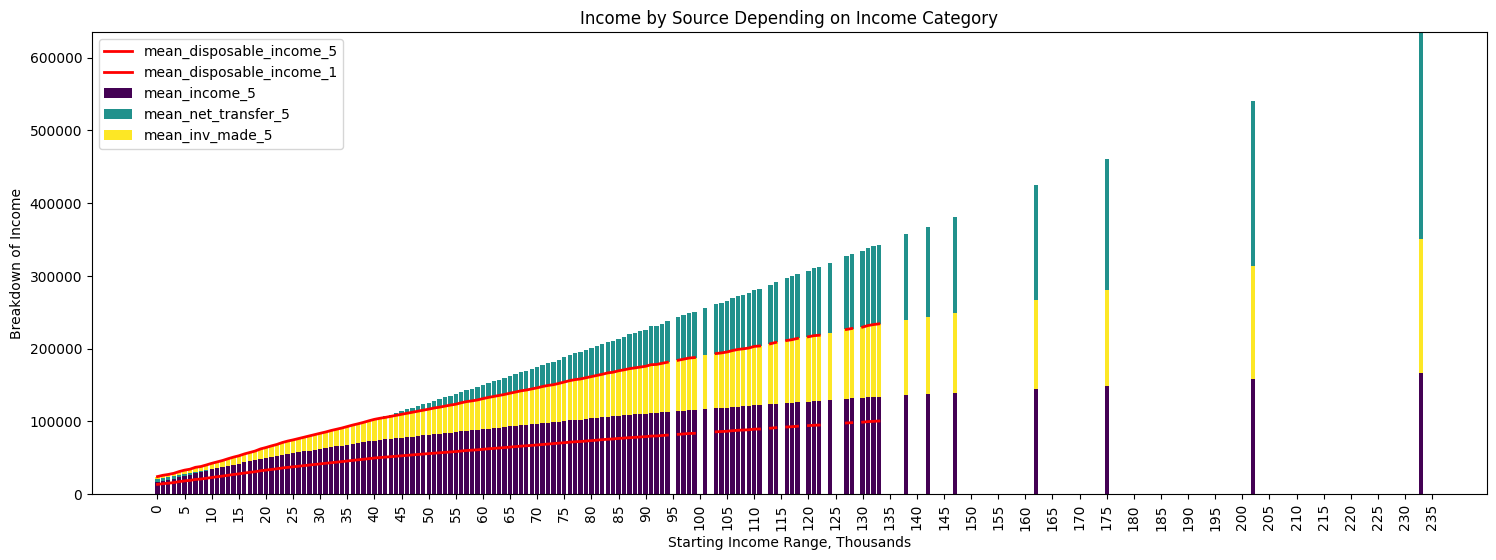

In [414]:
plot_ubi(ubi = ubi5, coltypes = ["mean_income", "mean_net_transfer_", "mean_inv_made_", "mean_disposable_income_1", "mean_disposable_income_5"])

##### And the Total Net Transfer (Relevant to the Government)

It is clear that the tax policy leads to a substantial surplus, since most income categories cumulatively receive a net negative transfer (pay in more money than they receive) from the government. It stays high for high income groups despite there being less individuals within them simply because they pay a non decreasing proportion of a higher income in tax, yet only receive a lower fixed amount (which represents a decreasing proportion of their income) in return, so can be outsized constributors.

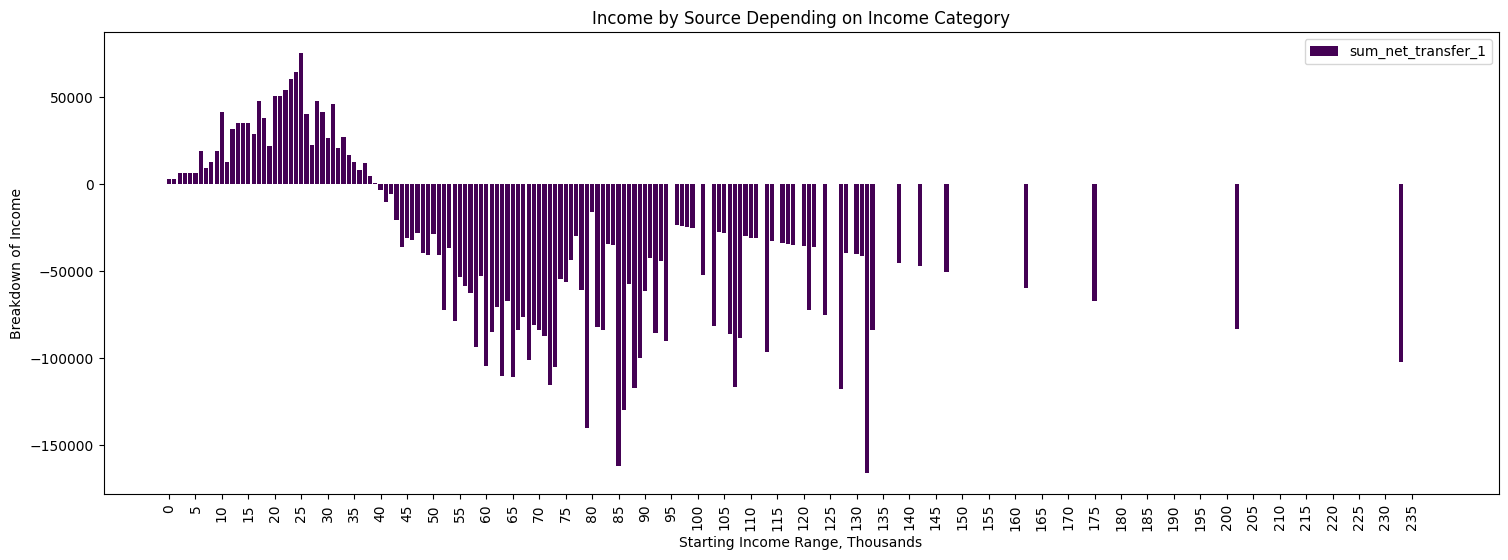

In [415]:
plot_ubi(ubi = UBI[0], coltypes = ["sum_net_transfer_"])

#### Last Period

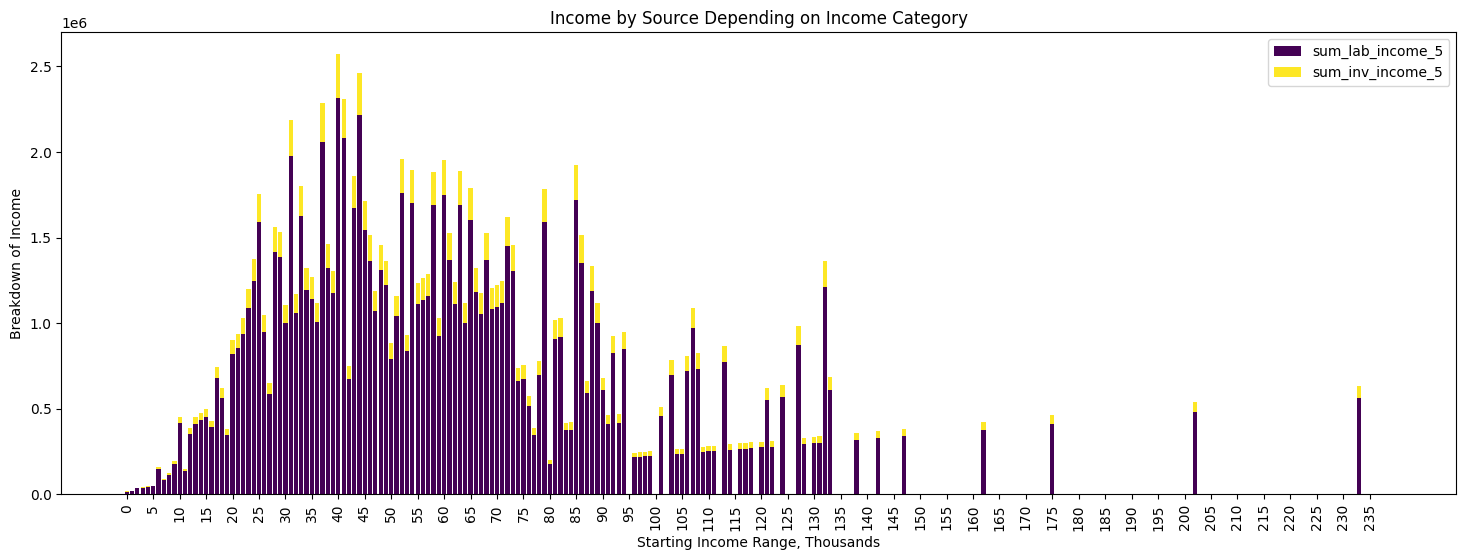

In [416]:
plot_ubi(ubi = UBI[4])

### Define and Use a Function That Plots the Distribution of the Categorised Variables for Multiple of the Periods in the UBI DataFrame

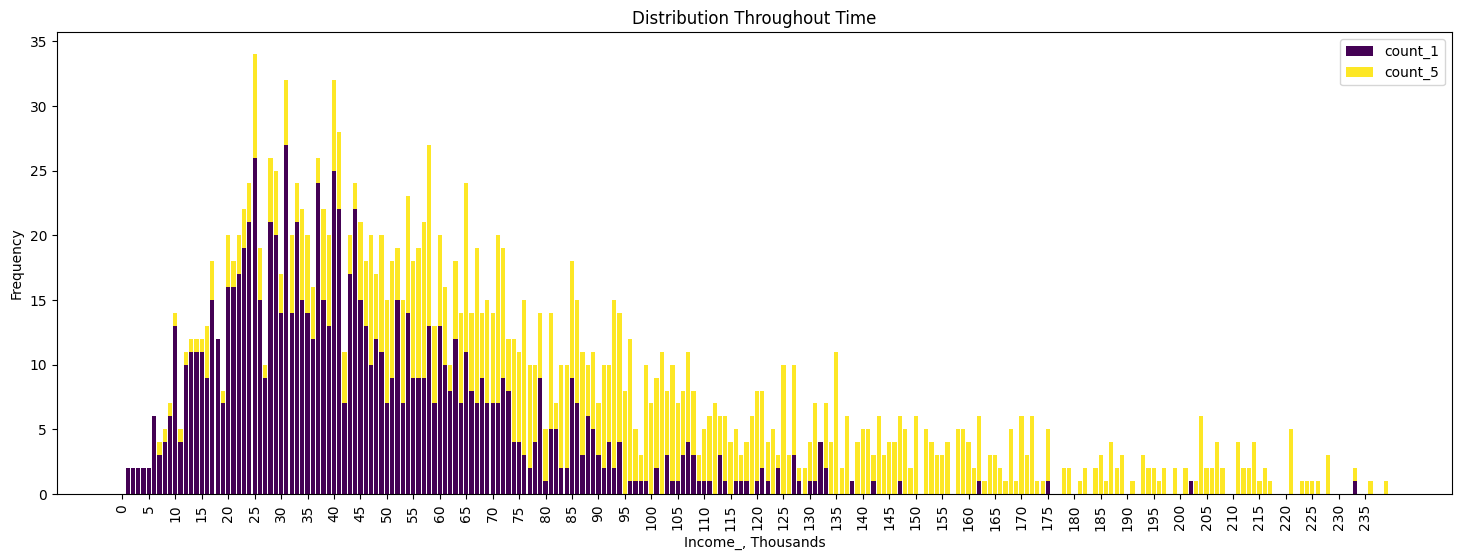

In [417]:


def plot_distribs(df=data, time_periods = [1,5],lim=250, coltype = 'income_'):
    # Find the range in the specified column type across ALL PERIODS
    col_max = df[[coltype + str(x) for x in range(1, I+1, 1)]].max().max()
    #current_col_min = 0
    col_min = df[[coltype + str(x) for x in range(1, I+1, 1)]].min().min()

    col_increments = np.arange(col_min-1000, col_max + 1000, 1000)

    plot_df = pd.DataFrame({'Range': [f'${int(col_increments[i])}-{int(col_increments[i+1])}' for i in range(len(col_increments) - 1)], 'UB': col_increments[1:]})
    # Create a frequency table each period, and add the corresponding count as a column
    for x in time_periods:
        col_frequencies, col_bins = np.histogram(df[coltype + str(x)], bins=col_increments)
        plot_df["count_" + str(x)] = col_frequencies
    # select only the rows that we want to plot (avoid high outliers)
    plot_df = plot_df.drop(plot_df[plot_df['UB'] > lim*1000].index)
    # select only the columns that we want to plot
    cols_to_plot = [col for col in plot_df.columns[1:] if "count" in col]
    
    # set up the figure
    plt.figure(figsize=(18, 6))
    bottom = None
    num_bars = len(cols_to_plot)
    colors = plt.cm.viridis(np.linspace(0, 1, num_bars))  # Generate a range of colors from yellow to red
    nth_bar = 0
    for n, col in enumerate(cols_to_plot):
                if n == 0:
                    plt.bar(range(len(plot_df)), plot_df[col], color=colors[nth_bar], label=str(col))  # Use color from the gradient
                    bottom = plot_df[col]  # Update the bottom values for subsequent sets of bars
                    nth_bar += 1
                else:
                    plt.bar(range(len(plot_df)), plot_df[col], bottom=bottom, color=colors[nth_bar], label=str(col))  # Use color from the gradient
                    bottom += plot_df[col]  # Update the bottom values for subsequent sets of bars
                    nth_bar += 1
    
    plt.xticks(np.arange(0, len(plot_df), 5))
    plt.xticks(rotation=90)
    plt.xlabel(f'{str.title(coltype)}, Thousands')
    plt.ylabel('Frequency')
    plt.title('Distribution Throughout Time')
    plt.legend()
    plt.show()

# Assuming x is defined elsewhere in your code
plot_distribs(data)


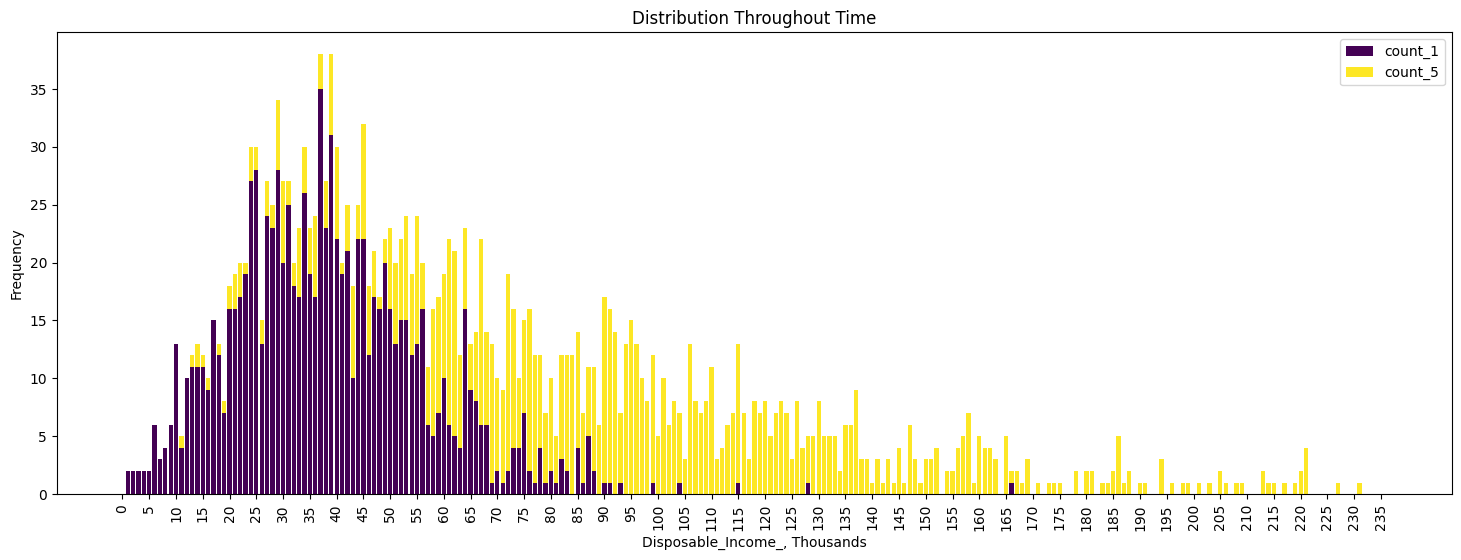

In [418]:
plot_distribs(coltype = 'disposable_income_')

## Generate summary statistics in a new table

In [419]:
data.agg([max, min])

C:\Users\danie\AppData\Local\Temp\ipykernel_3892\3448160133.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  data.agg([max, min])
C:\Users\danie\AppData\Local\Temp\ipykernel_3892\3448160133.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data.agg([max, min])


,lab_income_1,capital_1,inv_income_1,income_1,tax_1,ubi_amount_1,net_transfer_1,disposable_income_1,income_to_spend_1,inv_made_1,...,inv_income_category_5,income_category_5,tax_category_5,ubi_amount_category_5,net_transfer_category_5,disposable_income_category_5,income_to_spend_category_5,inv_made_category_5,capital_6,lab_income_6
max,295670.286152,1.091607e+06,76412.499831,372082.785983,195763.926396,3188.14079,3188.140790,179507.000378,67293.578801,112213.421577,...,$123192-124192,$1034465-1035465,$571000-572000,$6800-7800,$7198-8198,$470266-471266,$184921-185921,$285344-286344,2.054442e+06,1.126600e+06
min,9864.125401,6.651854e+03,465.629795,10329.755196,0.000000,3188.14079,-192575.785605,13517.895986,11198.972758,2318.923229,...,$192-1192,$15465-16465,$-1000-0,$6800-7800,$-564801--563801,$23266-24266,$19921-20921,$2344-3344,2.038634e+04,1.741287e+04


In [420]:
gov_rev = np.zeros(I)

def summary_stats(data = data, cols=['tax', 'income', 'inv_income', 'lab_income'], periods=I, aggfuncs = 'sum'):
    # Create an empty DataFrame to store the summary stats
    col_df = pd.DataFrame(index=range(periods))
    for col in cols:
        for i in range(periods):
            # Calculate the sum of the column for each period and store it in the DataFrame
            for aggfunc in aggfuncs:
                col_df.at[i, col + '_' + aggfunc] = data[col + '_' + str(i+1)].agg(aggfunc)

    return col_df

# Assuming 'data' and 'I' are defined elsewhere in your code
summary_data = summary_stats(cols = ['income'], aggfuncs = ['mean', 'min', 'max'])
print(summary_data)


     income_mean    income_min    income_max
0   56371.277366  10329.755196  3.720828e+05
1   68330.026306  11434.011454  5.063389e+05
2   82637.074946  12803.746982  6.583832e+05
3   99708.571493  14468.412397  8.327384e+05
4  120053.462983  16465.230167  1.034682e+06


## Define a Function That Plots Summary Statistics Across Time

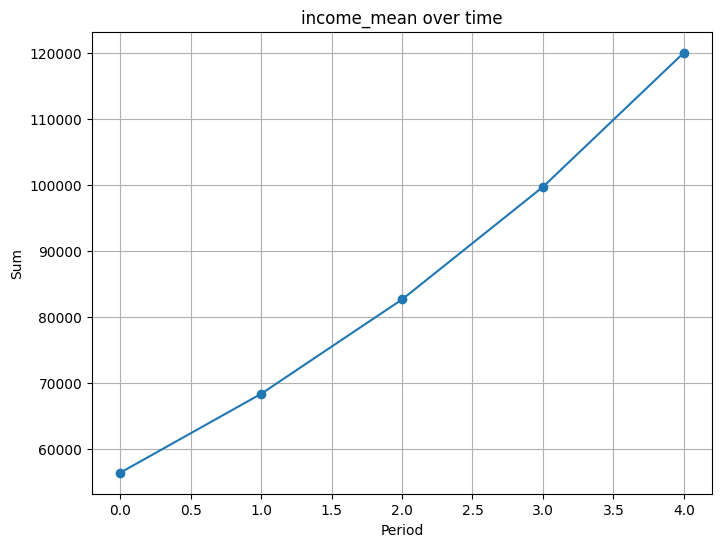

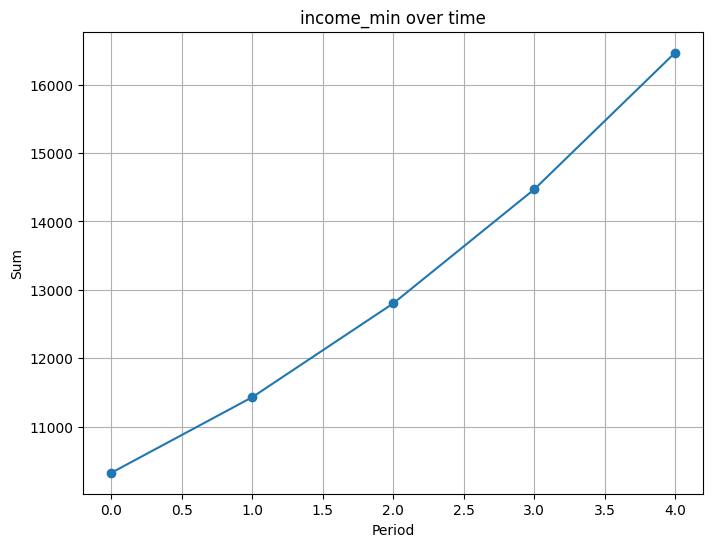

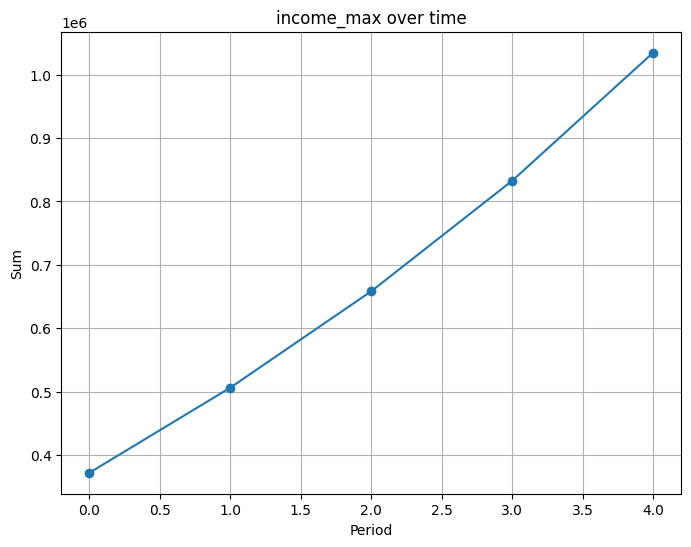

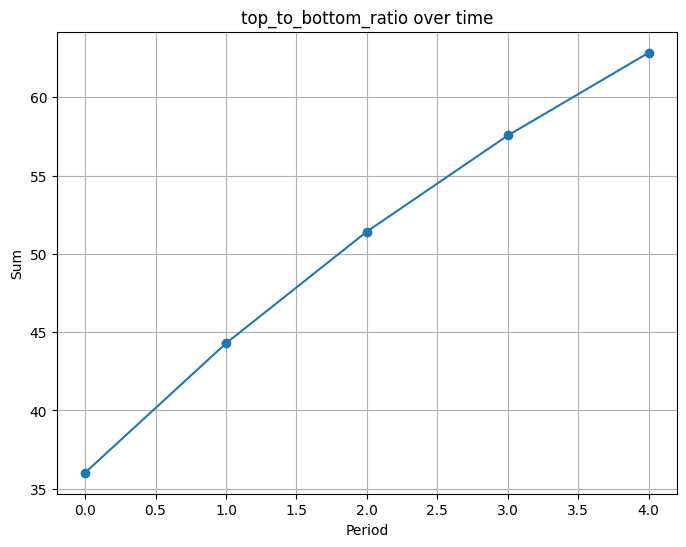

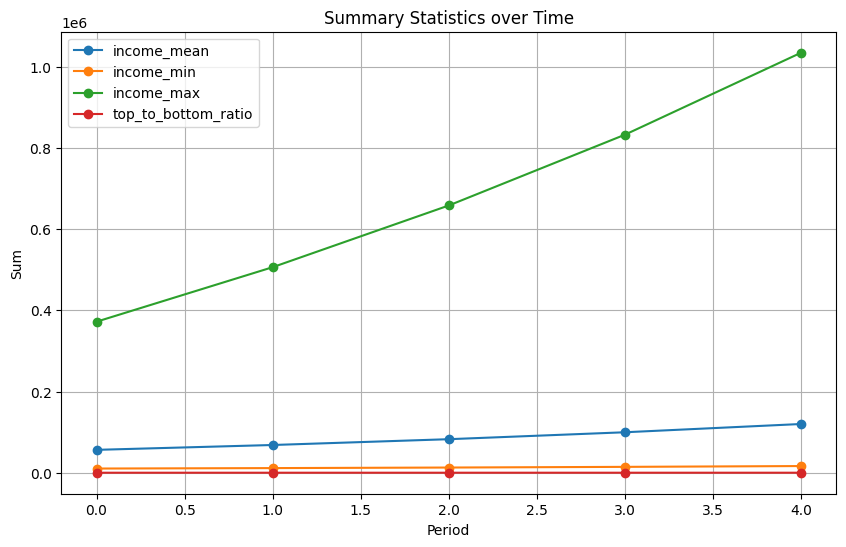

In [421]:


def plot_summary_stats(summary_data = summary_data):
    # Plot each column separately
    for col in summary_data.columns:
        plt.figure(figsize=(8, 6))
        plt.plot(summary_data.index, summary_data[col], marker='o', linestyle='-')
        plt.title(col + ' over time')
        plt.xlabel('Period')
        plt.ylabel('Sum')
        plt.grid(True)
        plt.show()

    # Plot all columns together on one subplot
    plt.figure(figsize=(10, 6))
    for col in summary_data.columns:
        plt.plot(summary_data.index, summary_data[col], marker='o', linestyle='-', label=col)
    plt.title('Summary Statistics over Time')
    plt.xlabel('Period')
    plt.ylabel('Sum')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'summary_data' DataFrame is obtained from the previous step
summary_data['top_to_bottom_ratio'] = summary_data.income_max/summary_data.income_min
plot_summary_stats(summary_data)


### Observations from Summary Stats Throughout time

It is clear that despite the fact that there are substantial net transfers from high to low income households through the Government's taxation and redistribution through UBI, which should leave the lowest incomes growing at a faster rate than otherwise and the highest incomes growing at a lower rate than otherwise, the highest incomes start with so much wealth and accumulate it as such higher rates that their overall incomes still grow faster than the poorest, leaving inequality to rise overall.